In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [14]:
df = pd.read_csv('heart.csv').reset_index()

In [15]:
df.head()

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           918 non-null    int64  
 1   Age             918 non-null    int64  
 2   Sex             918 non-null    object 
 3   ChestPainType   918 non-null    object 
 4   RestingBP       918 non-null    int64  
 5   Cholesterol     918 non-null    int64  
 6   FastingBS       918 non-null    int64  
 7   RestingECG      918 non-null    object 
 8   MaxHR           918 non-null    int64  
 9   ExerciseAngina  918 non-null    object 
 10  Oldpeak         918 non-null    float64
 11  ST_Slope        918 non-null    object 
 12  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 93.4+ KB


In [17]:
df.describe()

,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,458.500000,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,265.148072,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,229.250000,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,458.500000,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,687.750000,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,917.000000,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [19]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [20]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [21]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [22]:
df_encode = pd.get_dummies(df[['ChestPainType','RestingECG', 'ST_Slope','ExerciseAngina','Sex' ]],prefix=['ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina','Sex'], dummy_na=True).reset_index()

In [23]:
df_fin = pd.merge(df,df_encode, on='index', how='left')

In [24]:
df_fin.drop(columns=['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex'], inplace=True)

<AxesSubplot:>

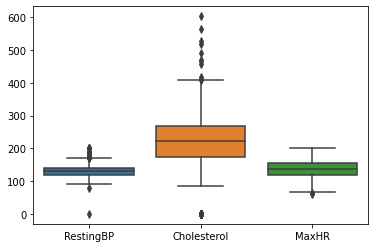

In [42]:
sns.boxplot(data=df[['RestingBP','Cholesterol','MaxHR']])
# sns.despine(offset=10, trim=True)

<AxesSubplot:>

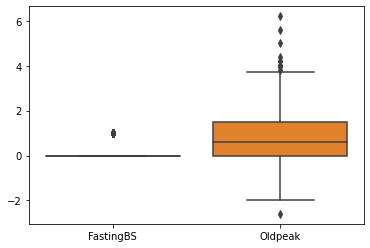

In [45]:
sns.boxplot(data=df[['FastingBS','Oldpeak']])
# sns.despine(offset=10, trim=True)

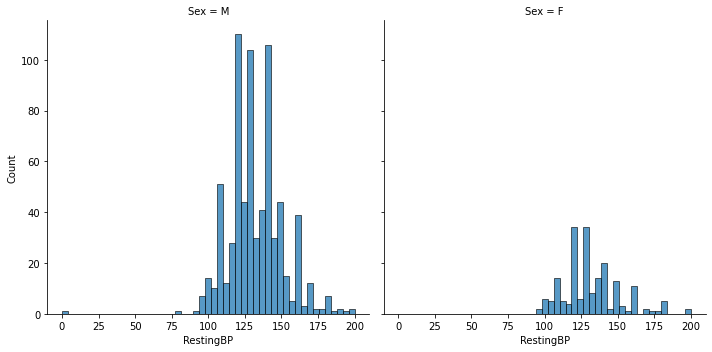

In [53]:
sns.displot(data=df,x='RestingBP', col='Sex')

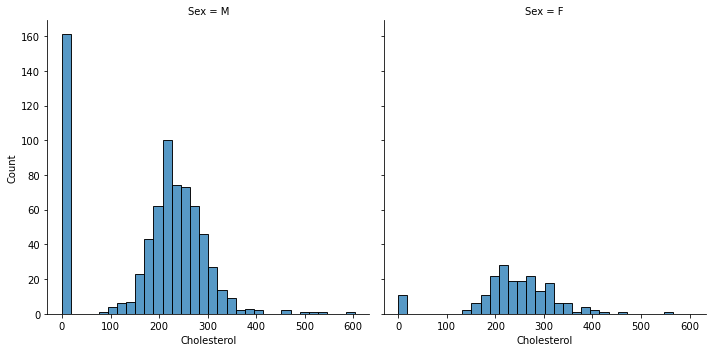

In [54]:
sns.displot(data=df,x='Cholesterol', col='Sex')

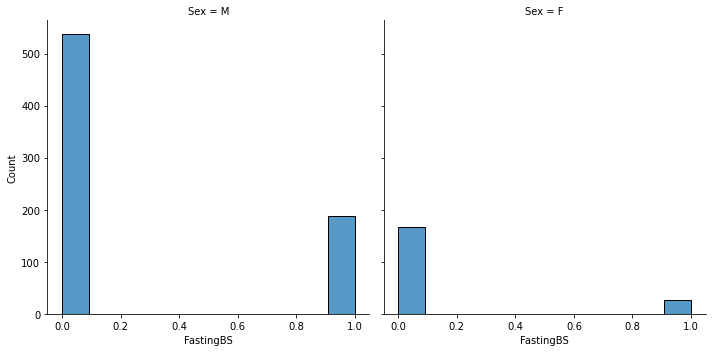

In [55]:
sns.displot(data=df,x='FastingBS', col='Sex')

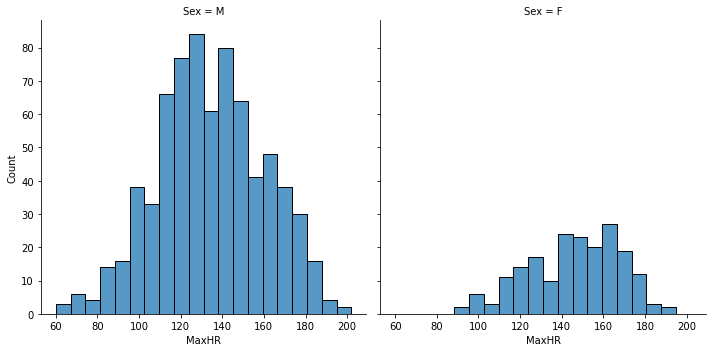

In [57]:
sns.displot(data=df,x='MaxHR', col='Sex')

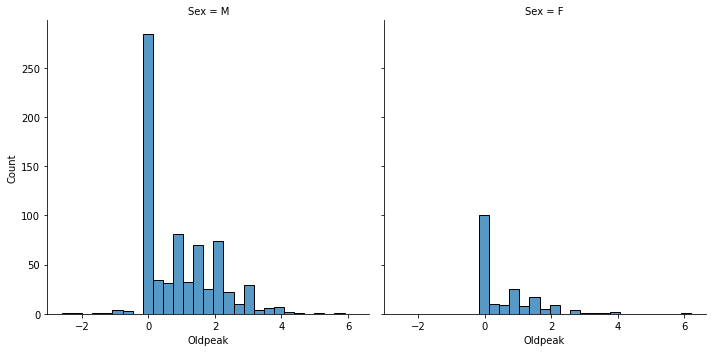

In [58]:
sns.displot(data=df,x='Oldpeak', col='Sex')

In [60]:
X = df_fin[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_nan','RestingECG_LVH','RestingECG_Normal' ,'RestingECG_ST','RestingECG_nan','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','ST_Slope_nan','ExerciseAngina_N','ExerciseAngina_Y','ExerciseAngina_nan','Sex_F','Sex_M','Sex_nan']] 
y = df_fin[['HeartDisease']]

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)

In [79]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [80]:
y_pred = decision_tree.predict(X_test)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [73]:
from sklearn.ensemble import RandomForestClassifier
model_RandForest = RandomForestClassifier(max_depth=5, random_state=42)

In [75]:
model_RandForest.fit(X_train, y_train)

C:\Users\spass\AppData\Local\Temp/ipykernel_12868/748444608.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RandForest.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [76]:
y_pred_rf = model_RandForest.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [100]:
feature_scores = pd.Series(model_RandForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feat_scores = feature_scores.to_frame().reset_index()

In [104]:
feat_scores.rename(columns={'index':'feature', 0:'score'}, inplace=True)

<AxesSubplot:xlabel='score', ylabel='feature'>

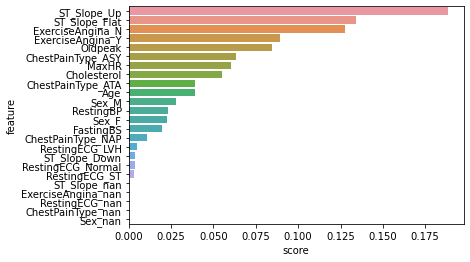

In [107]:
sns.barplot(data=feat_scores,y='feature', x='score')

In [110]:
from sklearn.ensemble import BaggingClassifier
model_bagging = BaggingClassifier(base_estimator=decision_tree,n_estimators=10, random_state=42)

In [112]:
model_bagging.fit(X_train, y_train)

C:\Users\spass\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=42),
                  random_state=42)

In [113]:
y_pred_bag=model_bagging.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [119]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [124]:
from sklearn.ensemble import StackingClassifier
estimators = [('dt', decision_tree),
              ('rf',model_RandForest),
               ('svc', LinearSVC(random_state=42))]
clf = StackingClassifier(estimators=estimators)

In [125]:
clf.fit(X_train, y_train)

C:\Users\spass\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\spass\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\spass\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\spass\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\spass\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       random_state=42)),
                               ('svc', LinearSVC(random_state=42))])

In [126]:
y_pred_stack = clf.predict(X_test)

In [127]:
print(classification_report(y_test, y_pred_stack))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80        77
           1       0.95      0.70      0.81       107

    accuracy                           0.80       184
   macro avg       0.82      0.82      0.80       184
weighted avg       0.84      0.80      0.80       184



### Выводы

Самый лучший результат получился у bagging.
Stacking не дал более хороший результат, возможно из-за не самого удачного выбора моделей.